<a href="https://colab.research.google.com/github/chaitanyaaditya/CapStone/blob/CapStone1/CapStoneProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Libraries

In [55]:
## Data Manipulation & Handling

import pandas as pd
import numpy as np

## Data Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

##Data Preprocessing & EDA libraries
from collections import OrderedDict

#Warning Filter library
import warnings
warnings.filterwarnings("ignore")

### Loading DataFrame

In [56]:
df=pd.read_excel('Capstone Project.xlsx')

In [57]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Problem statement - To predict strength of cement by studying 8 independednt features

#### Exploratory Data Analysis (EDA)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observations from df.info()
1. There are no null values in any feature
2. We have 1030 rows and 9 columns
3. Except age, all the features datatype is float
4. Dependent variable is strength and rest are independent variable

In [59]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Analysis from Descriptive Statictics:
1. There might be skewness in the columns
2. There might be a chance of outliers if we compare quartiles of few columns (age, cement, slag, superplastic, strength in the upper whisker region)
3. Since minimum and q1 values are same for ash and slag, we can say that we don't have outliers in the lower whisker region.
4. Range of values in age are 1 to 365 and values are in days.

In [60]:
def Custom_Summary(my_df):
    result=[]
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats=OrderedDict({
                'Feature Name': col,
                'count': my_df[col].count(),
                'Minimum': my_df[col].min(),
                'Quartile1': my_df[col].quantile(0.25),
                'Quartile2': my_df[col].quantile(0.50),
                'Quartile3': my_df[col].quantile(0.75),
                'Mean': my_df[col].mean(),
                'Variance': round(my_df[col].var()),
                'Standard Deviation': my_df[col].std(),
                'Skewness': my_df[col].skew(),
                'Kurtosis': my_df[col].kurt()
            })
            result.append(stats)
            
    result_df=pd.DataFrame(result)
    
    #Skewness Type:
    
    skewness_label=[]
    
    for i in result_df['Skewness']:
        if i <= -1:
            skewness_label.append('Highly Negatively Skewed')
        elif -1 < i <= -0.5:
            skewness_label.append('Moderately Negatively Skewed')
        elif -0.5 < i <= 0:
            skewness_label.append('Fairly Negatively Skewed')
        elif 0 < i <= 0.5:
            skewness_label.append('Fairly Positively Skewed')
        elif 0.5 < i <= 1:
            skewness_label.append('Moderately Positively Skewed')
        elif i > 1:
            skewness_label.append('Highly Positively Skewed')
            
    result_df['Skewness Comment'] = skewness_label
    
    #Kurtosis Type:
    
    kurtosis_label=[]
    
    for i in result_df['Kurtosis']:
        if i >= 1:
            kurtosis_label.append('Leptokurtic curve')
        elif i <= -1:
            kurtosis_label.append('Platycurtic curve')
        else:
            kurtosis_label.append('Mesokurtic curve')
            
    result_df['Kurtosis Comment'] = kurtosis_label
    
    #Outliers Type:
    
    outliers_label=[]
    
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.50)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                outliers_label.append('Have Outliers')
            else:
                outliers_label.append('No Outliers')
        
    result_df['Outlier Comment'] = outliers_label
        
    return result_df

In [61]:
Custom_Summary(df)

,Feature Name,count,Minimum,Quartile1,Quartile2,Quartile3,Mean,Variance,Standard Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,cement,1030,102.00,192.375,272.900,350.000,281.167864,10922,104.506364,0.509481,-0.520652,Moderately Positively Skewed,Mesokurtic curve,No Outliers
1,slag,1030,0.00,0.000,22.000,142.950,73.895825,7444,86.279342,0.800717,-0.508175,Moderately Positively Skewed,Mesokurtic curve,Have Outliers
2,ash,1030,0.00,0.000,0.000,118.300,54.188350,4096,63.997004,0.537354,-1.328746,Moderately Positively Skewed,Platycurtic curve,No Outliers
3,water,1030,121.80,164.900,185.000,192.000,181.567282,456,21.354219,0.074628,0.122082,Fairly Positively Skewed,Mesokurtic curve,Have Outliers
4,superplastic,1030,0.00,0.000,6.400,10.200,6.204660,36,5.973841,0.907203,1.411269,Moderately Positively Skewed,Leptokurtic curve,Have Outliers
5,coarseagg,1030,801.00,932.000,968.000,1029.400,972.918932,6046,77.753954,-0.040220,-0.599016,Fairly Negatively Skewed,Mesokurtic curve,No Outliers
6,fineagg,1030,594.00,730.950,779.500,824.000,773.580485,6428,80.175980,-0.253010,-0.102177,Fairly Negatively Skewed,Mesokurtic curve,Have Outliers
7,age,1030,1.00,7.000,28.000,56.000,45.662136,3990,63.169912,3.269177,12.168989,Highly Positively Skewed,Leptokurtic curve,Have Outliers
8,strength,1030,2.33,23.710,34.445,46.135,35.817961,279,16.705742,0.416977,-0.313725,Fairly Positively Skewed,Mesokurtic curve,Have Outliers


Analysis from Custom Summary
1. Cement has a mesokurtic curve which implies the data points are moderate in distance from the mean, so mean and SD are moderate.
2. Slag mesokurtic
3. Ash has platykurtic curve which implies mean doesn't represent whole data properly. So, SD is high.
4. Superplastic has a leptocurtic curve, which implies data points are closer to the mean.

## Performing Outlier treatment

In [62]:
def replace_outlier(my_df, col, method='Quartile', strategy='Median'):
    col_data=my_df[col]
    
    if method=='Quartile':
        #Using Quartile to calculate IQR
        q1=col_data.quantile(0.25)
        q2=col_data.quantile(0.50)
        q3=col_data.quantile(0.75)
        
        IQR=q3-q1
        LW=q1-1.5*IQR
        UW=q3+1.5*IQR
        
    elif method == 'Standard Deviation':
        mean = col_data.mean()
        std_dev = col_data.std()
        LW = mean - 2*std_dev
        UW = mean + 2*std_dev
    else:
        print('Pass a correct method')
        
    # Printing all the outliers
    
    outliers= my_df.loc[(col_data < LW) | (col_data > UW)]
    outlier_density = round(len(outliers)/len(my_df),2)*100
    
    if len(outliers) == 0:
        print(f'Feature {col} does not have outliers')
        print('\n')
    else:
        print(f'Feature {col} have outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'Outlier percentage in {col} is {outlier_density}%')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
        
    #Replacing Outliers
    
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = q2
    elif strategy == 'Mean':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = mean
    else:
        print('Pass a correct strategy')
        
    return my_df

## ODT Plots (Outlier Detection Techniques)

1. Descriptive Plots
2. Histogram with Outliers
3. Histogram without Outliers

In [63]:
def odt_plots(my_df, col):
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,8)) # 1 row and 3 columns in output plot
    
    #Descriptive statistics box plot
    
    sns.boxplot(my_df[col], ax=ax1)
    ax1.set_title(col + ' ' +'Box Plot')
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Boxplot')
    
    #Plotting Histogram with Outliers
    
    sns.distplot(my_df[col], ax=ax2, fit=sci.norm)
    ax2.axvline(my_df[col].mean(), color='green')
    ax2.axvline(my_df[col].median(), color='brown')
    ax2.set_title(col + ' ' + 'Histogram with Outliers')
    ax2.set_ylabel('Density')
    ax2.set_xlabel('Values')

    #Replacing Outliers
    df_out = replace_outlier(my_df,col)

    #Plotting Histogram without Outliers
    sns.distplot(df_out[col], ax=ax3, fit=sci.norm)
    ax3.axvline(df_out[col].mean(), color='green')
    ax3.axvline(df_out[col].median(), color='brown')
    ax3.set_title(col + ' ' + 'Histogram without Outliers')
    ax3.set_ylabel('Density')
    ax3.set_xlabel('Values')
    plt.show()

Feature cement does not have outliers




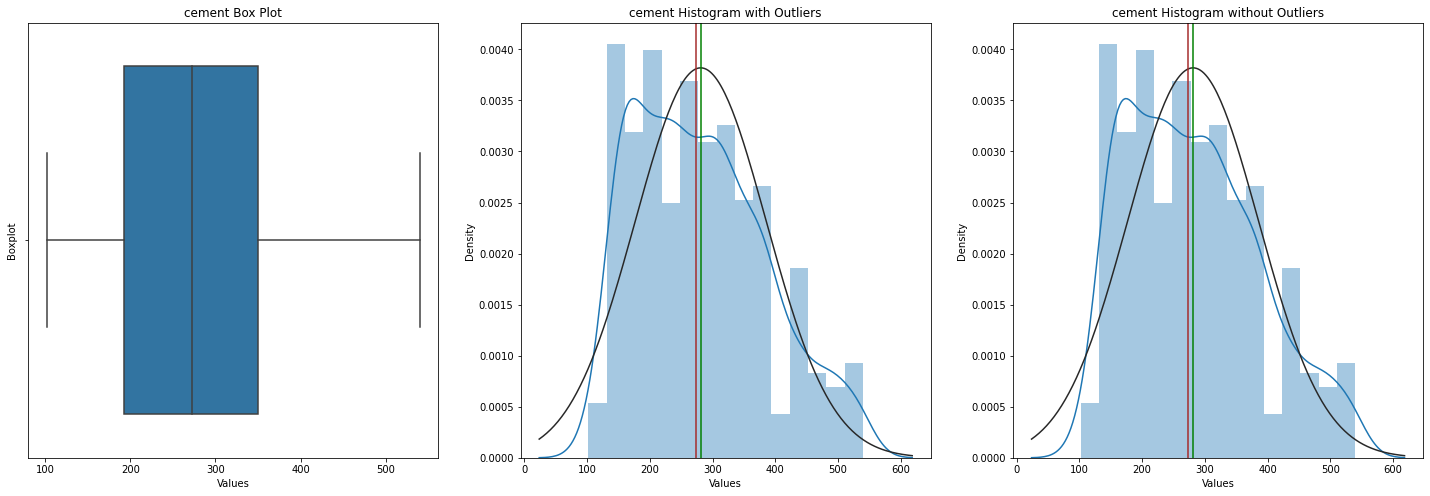

Feature slag have outliers


Total number of outliers in slag are 2


Outlier percentage in slag is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


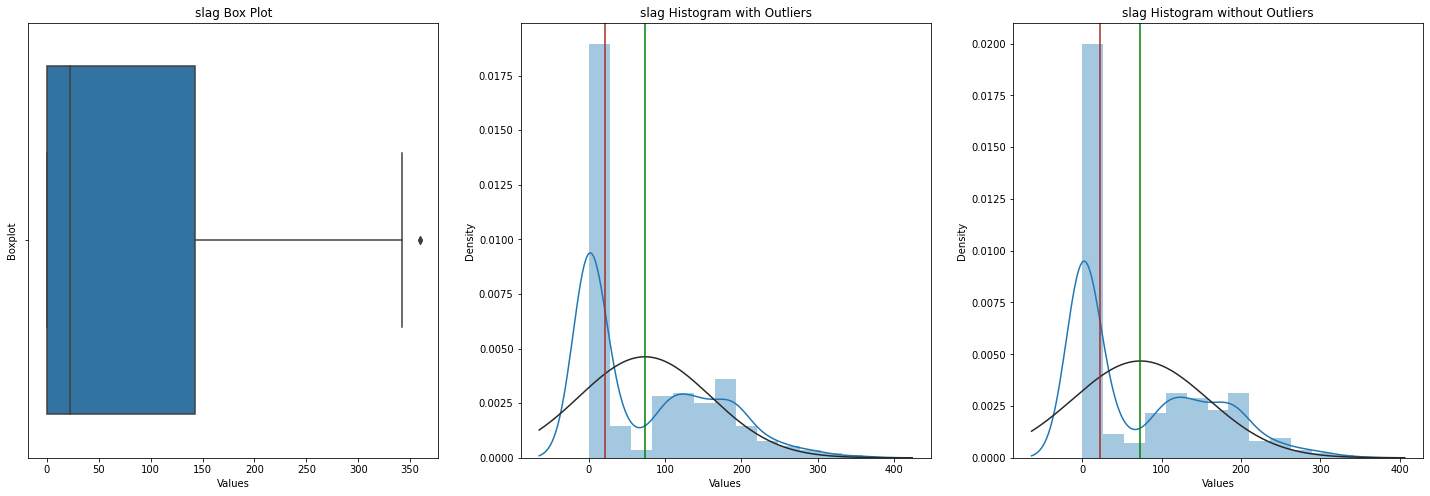

Feature ash does not have outliers




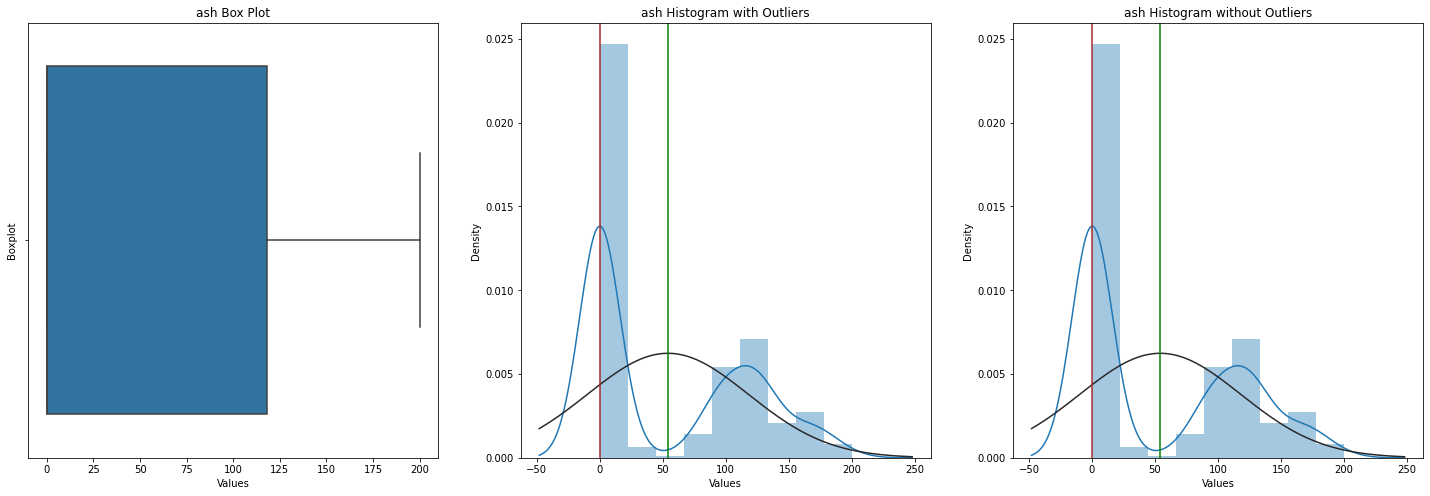

Feature water have outliers


Total number of outliers in water are 9


Outlier percentage in water is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


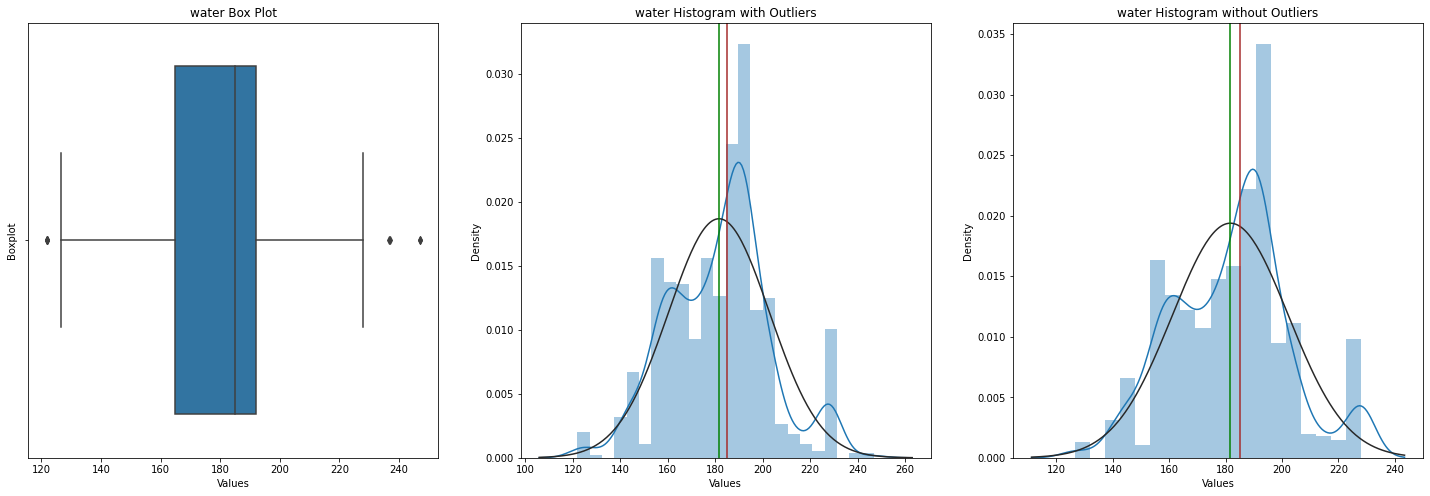

Feature superplastic have outliers


Total number of outliers in superplastic are 10


Outlier percentage in superplastic is 1.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


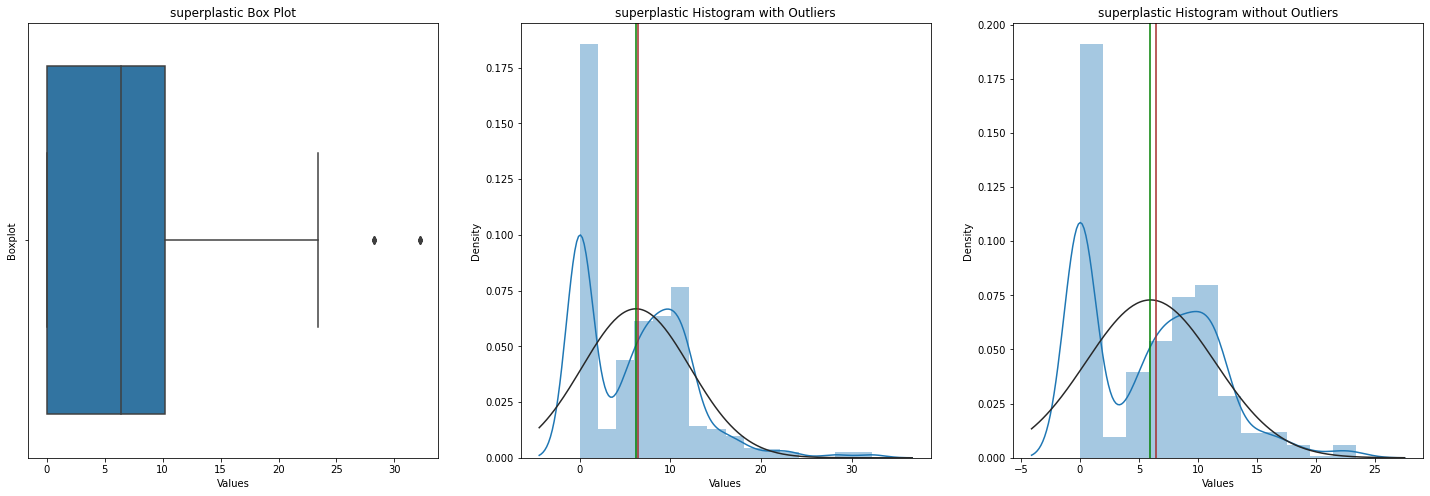

Feature coarseagg does not have outliers




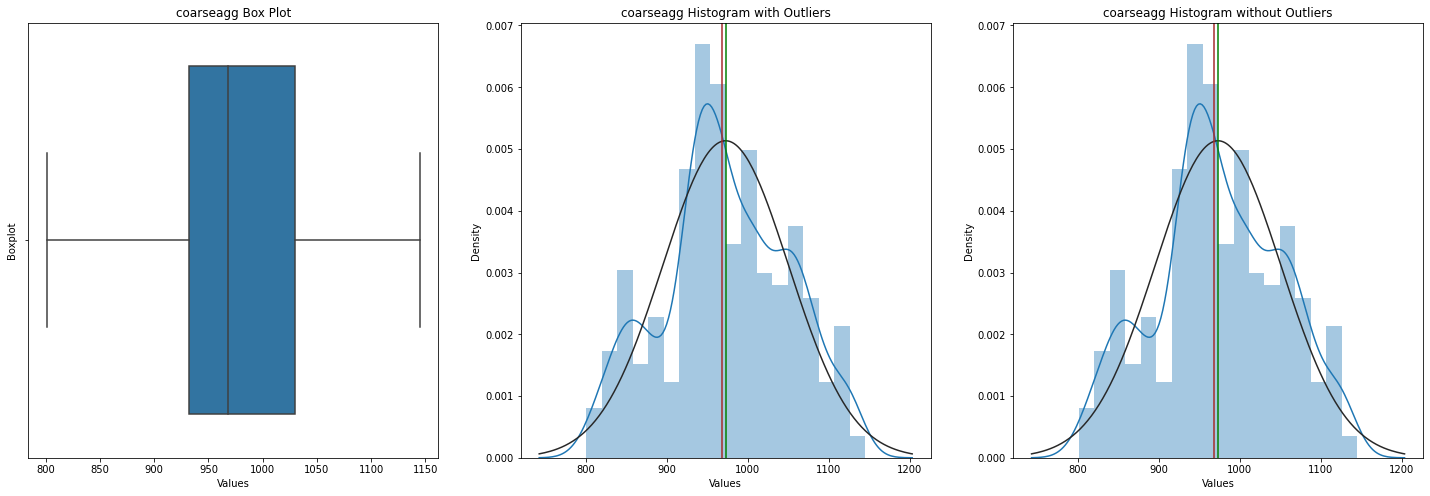

Feature fineagg have outliers


Total number of outliers in fineagg are 5


Outlier percentage in fineagg is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


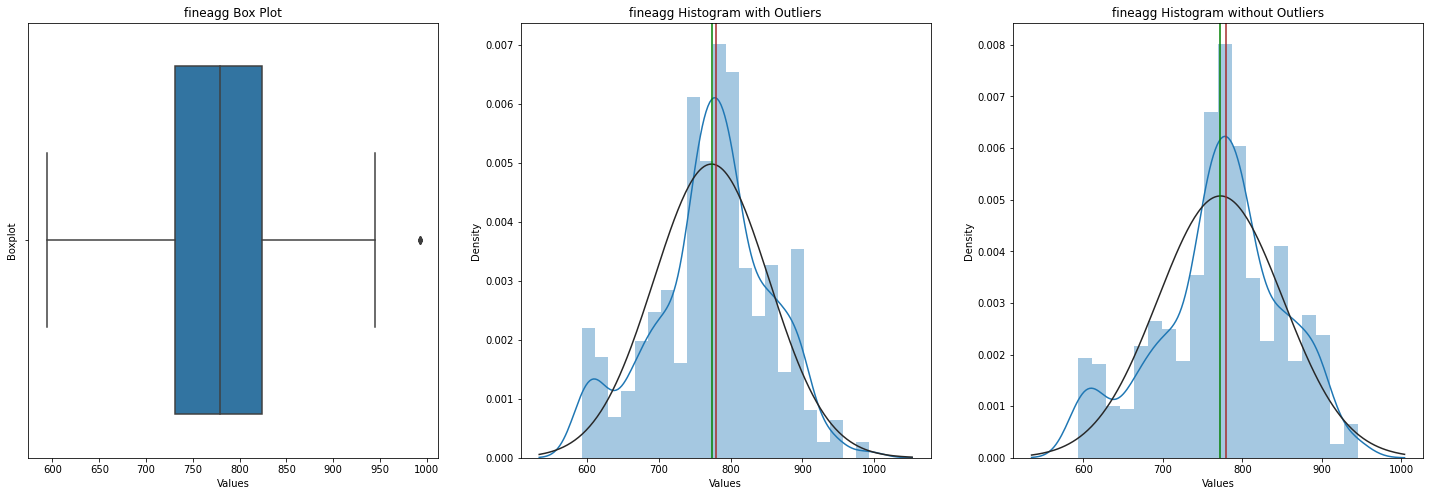

Feature age have outliers


Total number of outliers in age are 59


Outlier percentage in age is 6.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


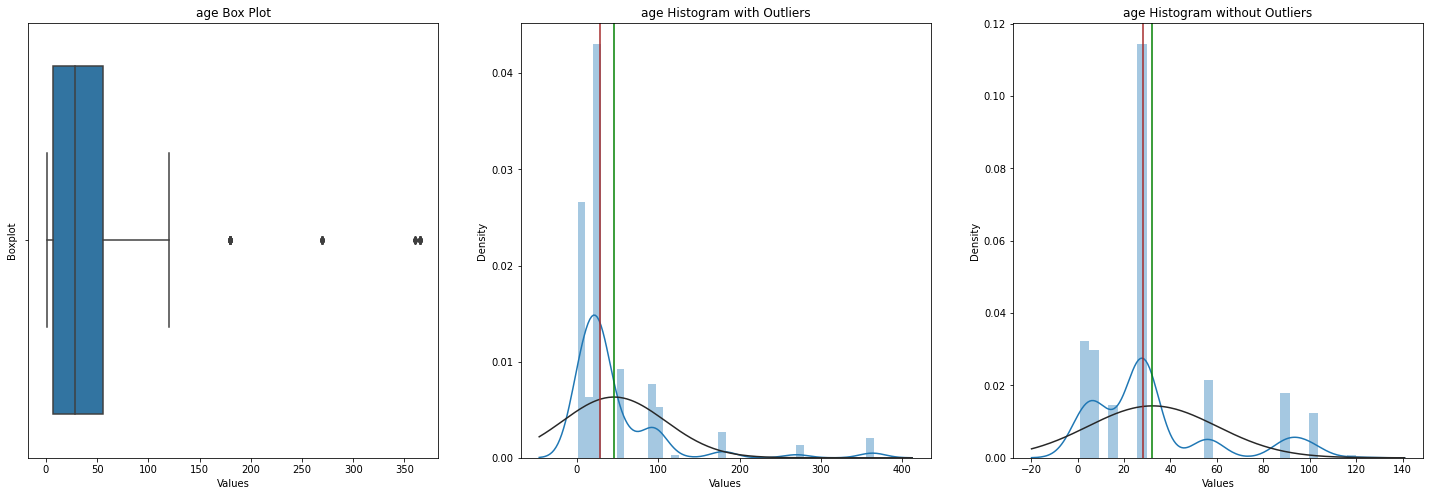

Feature strength have outliers


Total number of outliers in strength are 4


Outlier percentage in strength is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


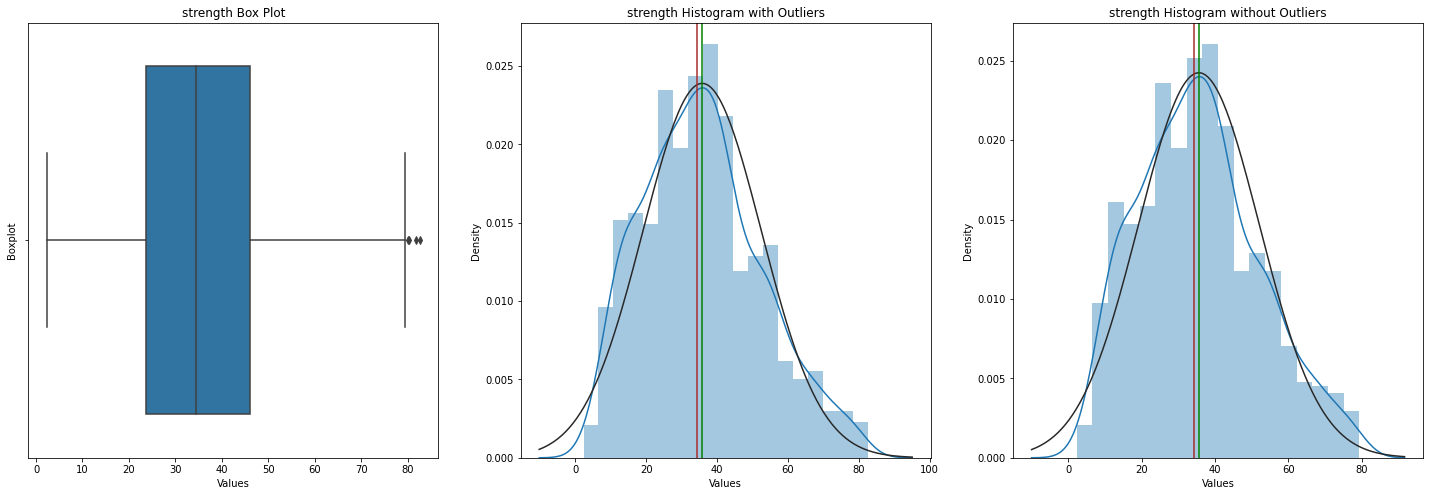

In [64]:
for col in df.columns:
  odt_plots(df, col)

Feature age have outliers


Total number of outliers in age are 131


Outlier percentage in age is 13.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
15,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97
26,304.0,76.0,0.0,228.0,0.0,932.0,670.0,90,49.19
27,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
34,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,90,37.91
...,...,...,...,...,...,...,...,...,...
984,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,100,53.66
991,401.8,94.7,0.0,147.4,11.4,946.8,852.1,91,75.50
1000,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,100,37.96
1008,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,100,59.30


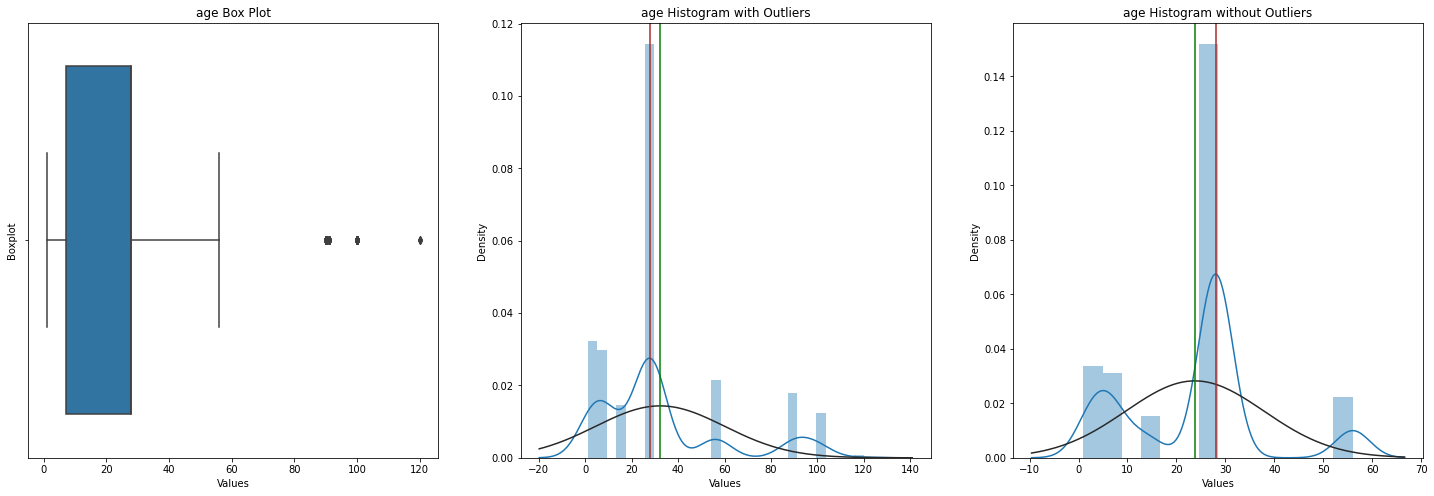

In [65]:
odt_plots(df,'age')